# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/MIT/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations: The DataFrame has 9 columns and 1898 rows. The shape of the dataset is a tuple of 2 elements. The first element shows the number of rows in the data and the second element shows the number of columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:

*   There are 3 different data types - int64 (represents numerical variables for whole numbers), float64 (represents numerical variables for numbers with a decimal) and object (represents catergorical variables)
*   There are 5 numerical columns (four are of the type int64 and one of the type float64). The cost of the order is required to be of float 64 since a floating point is needed to represent cost.

*   All other columns are categorical.

*   Surprisingly, rating is a categorical variable, where it should be of the type int64.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
# using na_values to tell python which values it should consider as NaN
df_with_na = pd.read_csv('/content/drive/My Drive/MIT/foodhub_order.csv', na_values=['Not given'])
print(df_with_na.isnull().sum())
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)
print("After imputing: ")
print(df.isnull().sum())

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64
After imputing: 
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

*   From the first five rows, we can see that there are mixed data type values in the rating column like - 'Not given' which should actually be read as missing values (NaN). We replace such data points with null values.

*   We also see that there are 736 such missing values in the rating column


*   We also change the data type to float.

*   Then we impute the missing values with the median.
*   And now we can see that the missing values have been replaced and there are no more null values in the data frame







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.598525,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.662289,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

*   The average time it takes for food to be prepared once an order is placed is 27.37 minutes.

*   The maximum time it takes for food to be prepared once an order is placed is 35.00 minutes.

*   The minimum time it takes for food to be prepared once an order is placed is 20.00 minutes.





### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
print("Before imputing: ")
print(df_with_na['rating'].isnull().sum())
print("After imputing: ")
df['rating'].isnull().sum()

Before imputing: 
736
After imputing: 


0

#### Observations:

1.   We see that before we imputed the data to replaced the missing values in the rating column, there were 736 orders that were not rated.
2.   After treating the missing values, there are no orders that are not rated.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

array([[<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'food_preparation_time'}>,
        <Axes: title={'center': 'delivery_time'}>]], dtype=object)

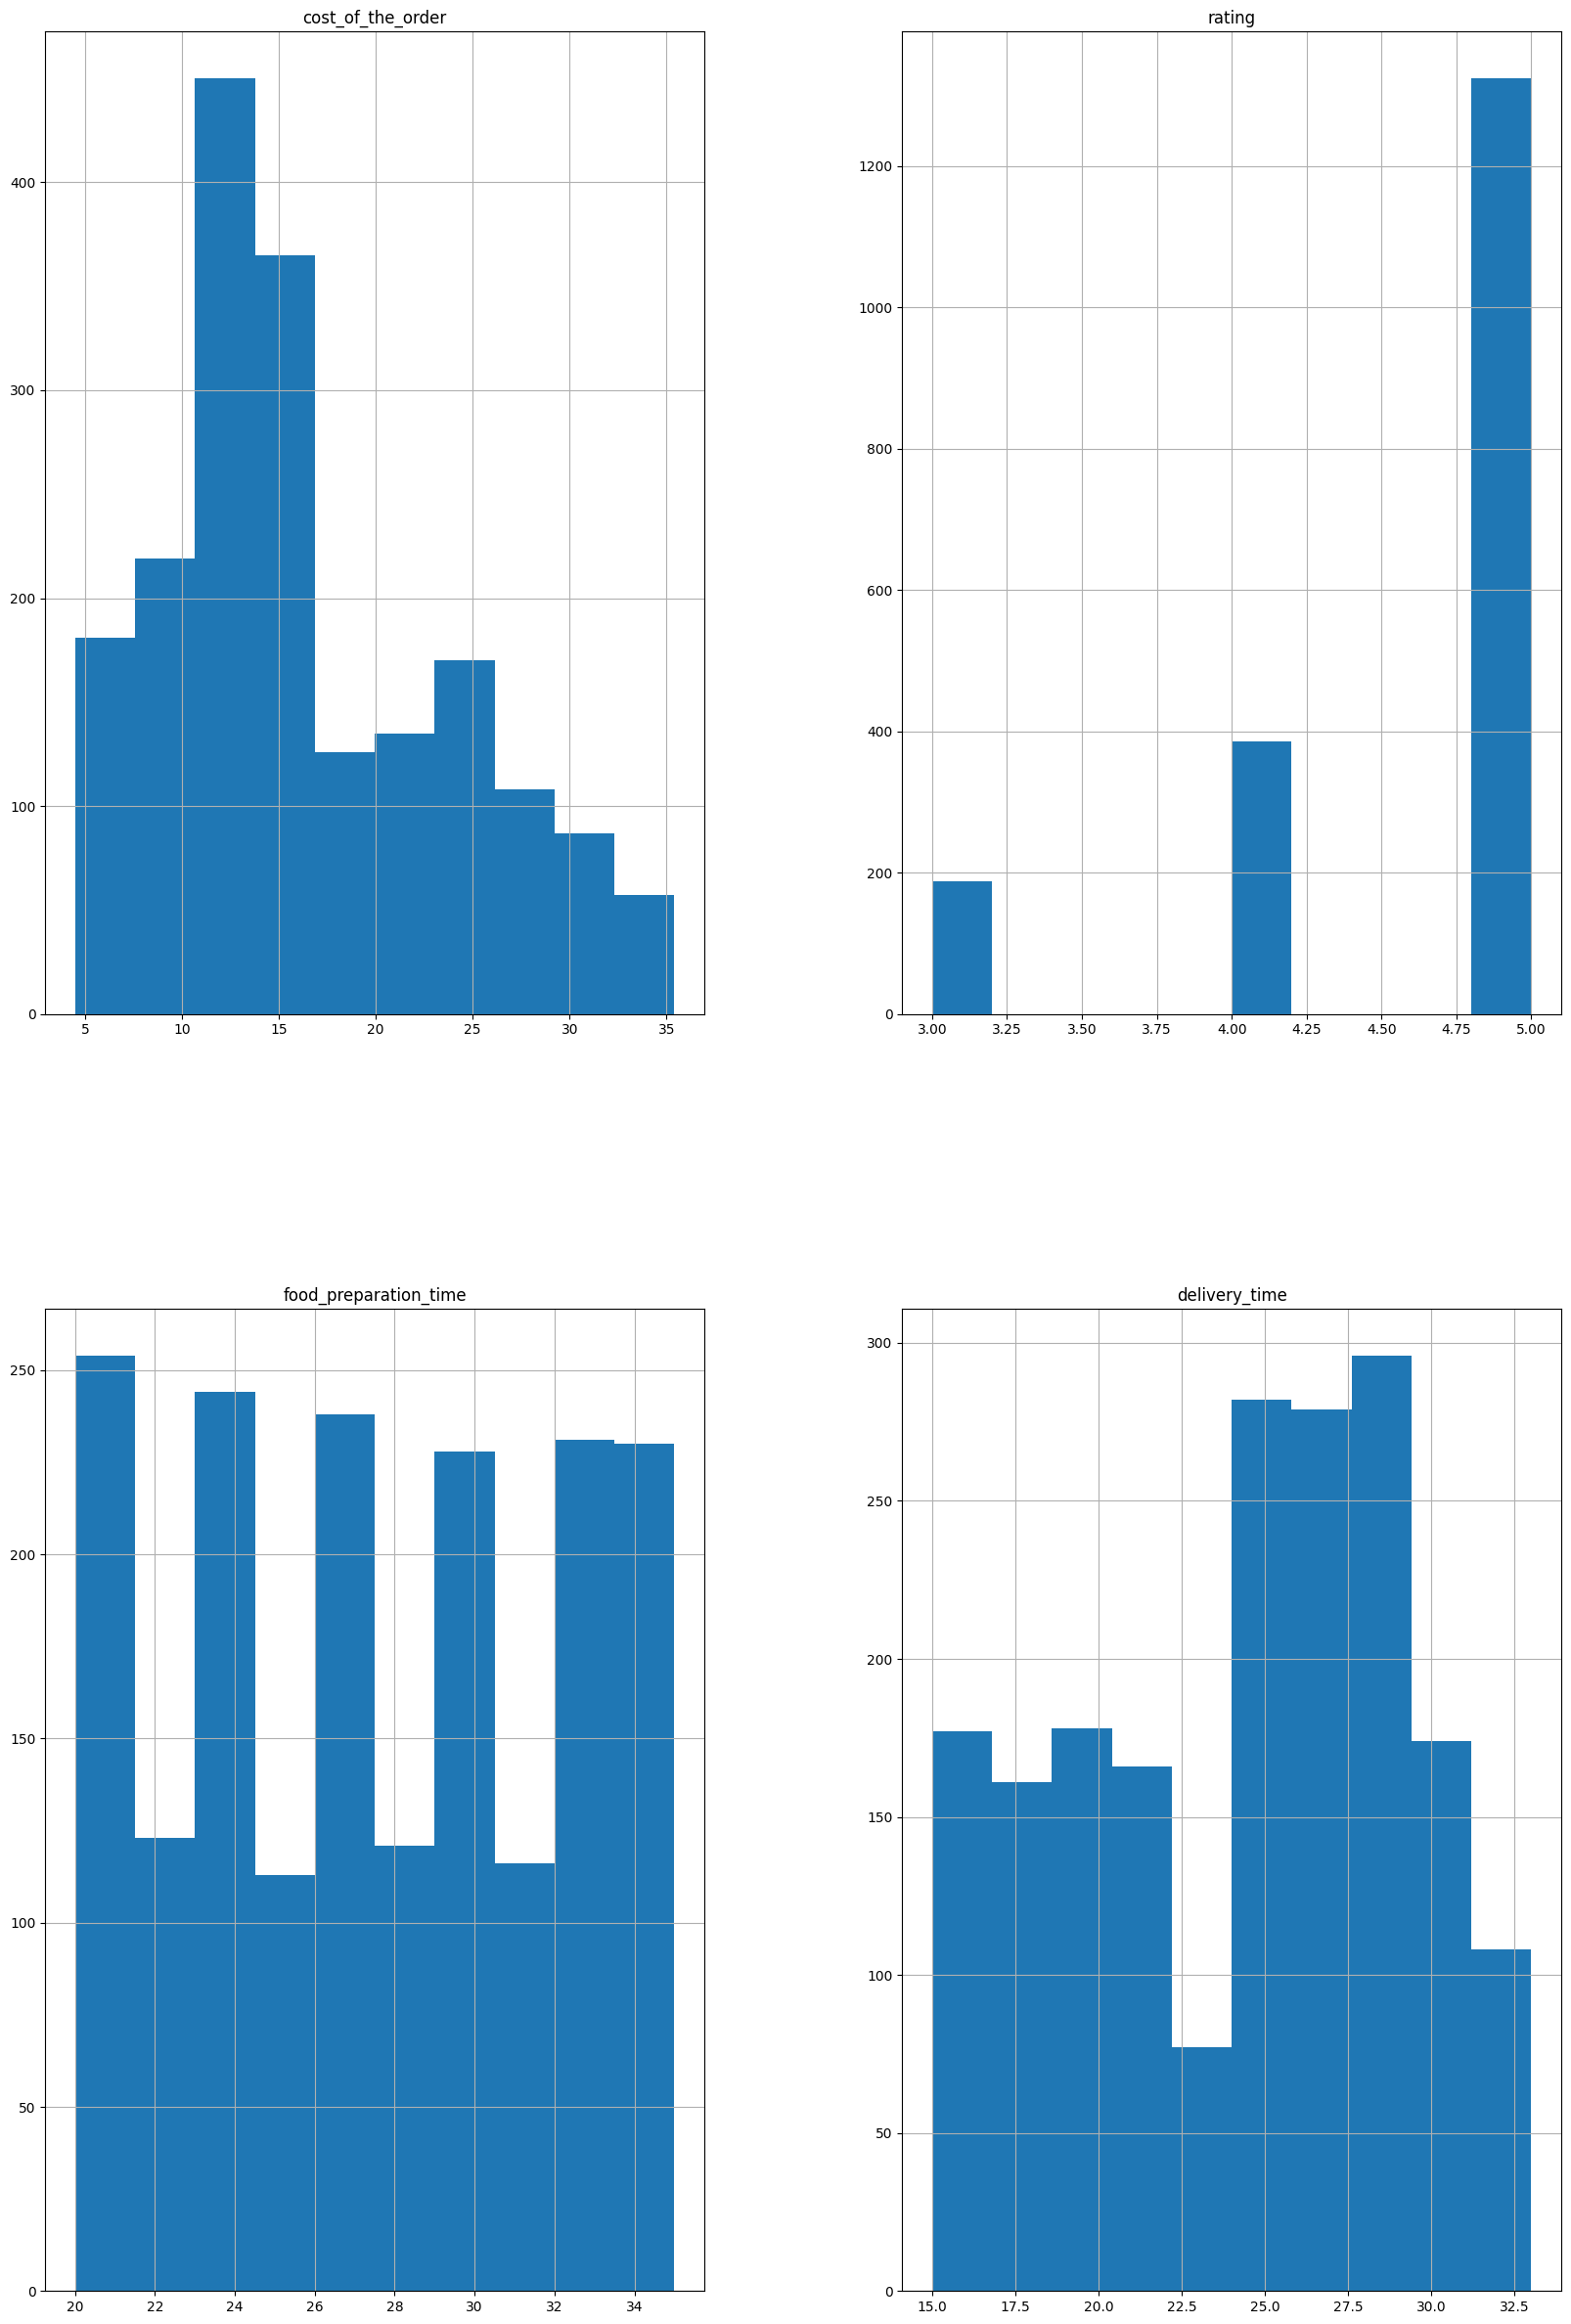

In [ ]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
numerical_columns =['cost_of_the_order','rating','food_preparation_time','delivery_time']

df[numerical_columns].hist(figsize=(20,30))



We can see that histograms have been generated of the numeric columns.


*   The distribution of the cost of the order shows a peak at lower values with a right-skewed tail, indicating most orders are low cost.
*   The histogram for rating shows clusters around specific numbers, which shows us with most customers give similar ratings. Most customers give a rating of 5.

*   The food preparation time has a more uniform histogram with a concentration around 25-30 minutes, but with its highest peak at 20 minutes.
*   The histogram for food delivery time has an unexpected drop at 22.5 to 24 minutes, and then a sudden peak from 24 minutes to about 28 minutes.






<Axes: ylabel='cost_of_the_order'>

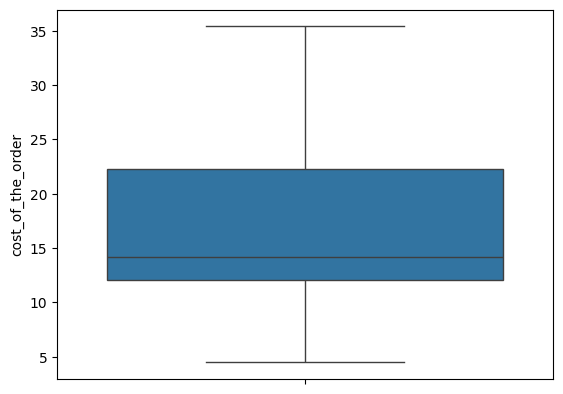

In [ ]:
sns.boxplot(y=df['cost_of_the_order'])


The boxplot for the cost of the order supports our observations from the histogram: most orders are low cost, which is why we observe from the boxplot that the median is at 15.

<Axes: xlabel='count', ylabel='cuisine_type'>

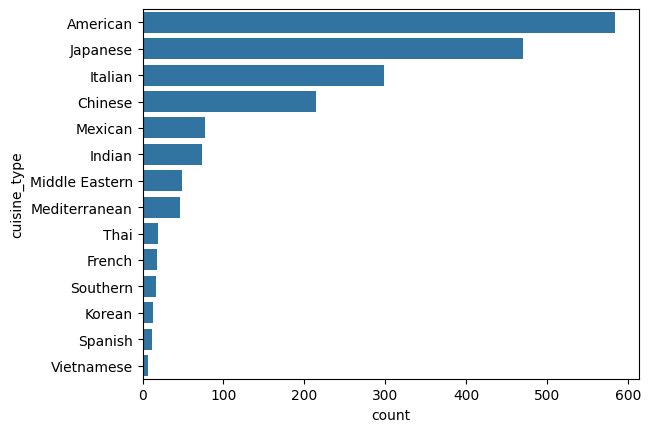

In [ ]:
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)

For the categorical variable cuisine type, we see that American cuisine is the most popular and Vietnamese is the least popular with the least number of orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

<Axes: xlabel='count', ylabel='restaurant_name'>

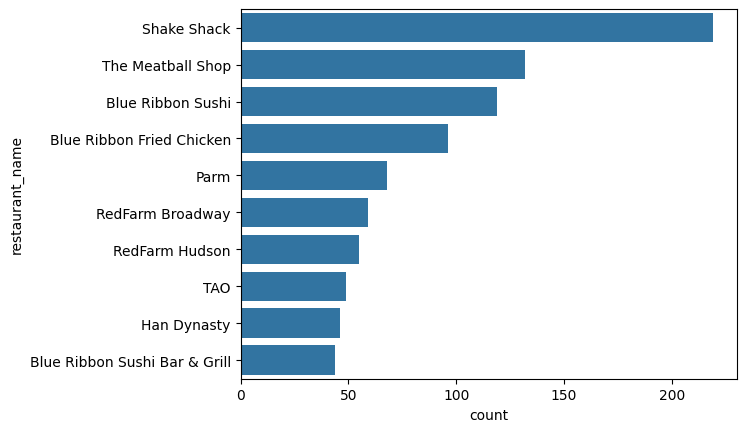

In [ ]:
# Write the code here
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index
top_10_data = df[df['restaurant_name'].isin(top_10_restaurants)]
sns.countplot(data=top_10_data, y='restaurant_name', order=top_10_restaurants)


#### Observations:


*   We see from this countplot the top 10 restaurants based on number of orders recieved, that the top 5 restaurants are


1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm







```
# This is formatted as code
```

### **Question 8**: Which is the most popular cuisine on weekends?

---



<Axes: ylabel='cuisine_type'>

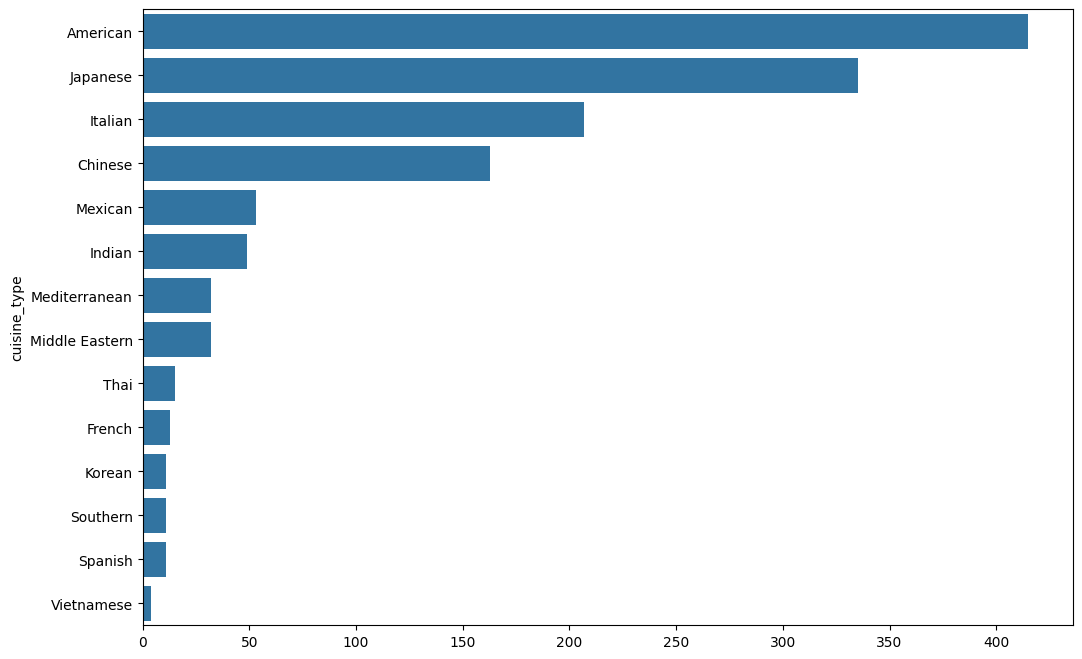

In [ ]:
# Write the code here

weekend_data = df[df['day_of_the_week'] == 'Weekend']


weekend_cuisine_counts = weekend_data['cuisine_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=weekend_cuisine_counts.values, y=weekend_cuisine_counts.index)



#### Observations:
The most popular cuisine on the weekends is American, which is consistent with our previous observations because we have seen that the most popular cuisine overall is also American.

\### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
total_orders = len(df)
orders_cost_more_than_20 = len(df[df['cost_of_the_order'] > 20])
percentage_above_20 = (orders_cost_more_than_20 / total_orders) * 100
print(f"Percentage of orders costing more than 20 dollars: {percentage_above_20:.2f}%")


Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:
The boxplot made previously for the cost of the order supports this calculation, because the median value in the box plot is below $20, indicating that a large amount of values are clustered below this value.

### **Question 10**: What is the mean order delivery time?

> Add blockquote



In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
This is consistent with our histogram observations, where there is a suddent peak at 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to


the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
customer_order_counts = df['customer_id'].value_counts()
top_customers = customer_order_counts.nlargest(3)
print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 most frequent customers have the IDs:


1.   52832
2.   47440
3.   83287




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

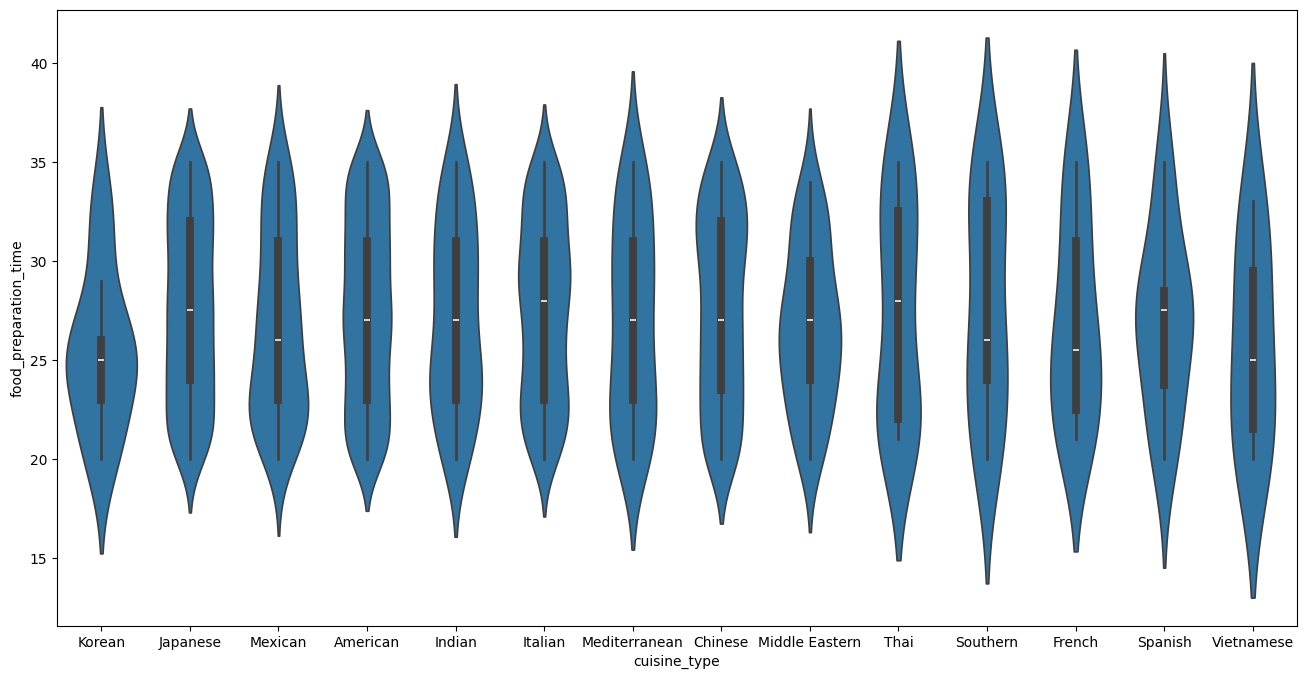

In [ ]:
# Write the code here
plt.figure(figsize=(16, 8))
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df)



*  The distribution across cuisines is varied, but all have a median lying in betwwen the range of 25- 30 minutes.

*  The distribution for the Korean cuisine is wider, which suggests a variability in preparation times across different orders.


*   The Thai, Southern and Vitenamese cuisines are narrow, showing consistency of preparation times.
*   The Spanish cuisine shows a symmetrical violin which indicates a normal distribution for the preparation times.





<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

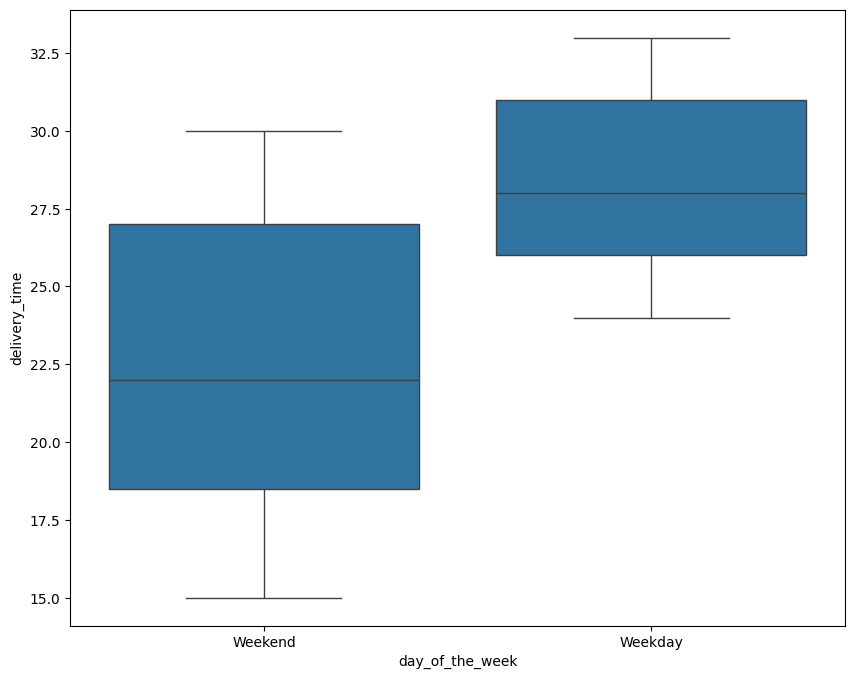

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)

We see that the Weekend delivery times are much lower than on weekends, with weekends having a median of about 22 minutes and the weekdays having a median of about 27.5 minutes. There are no significant outliers in each and a weekday delivery time is shown to go as high as 33 minutes.

<Axes: >

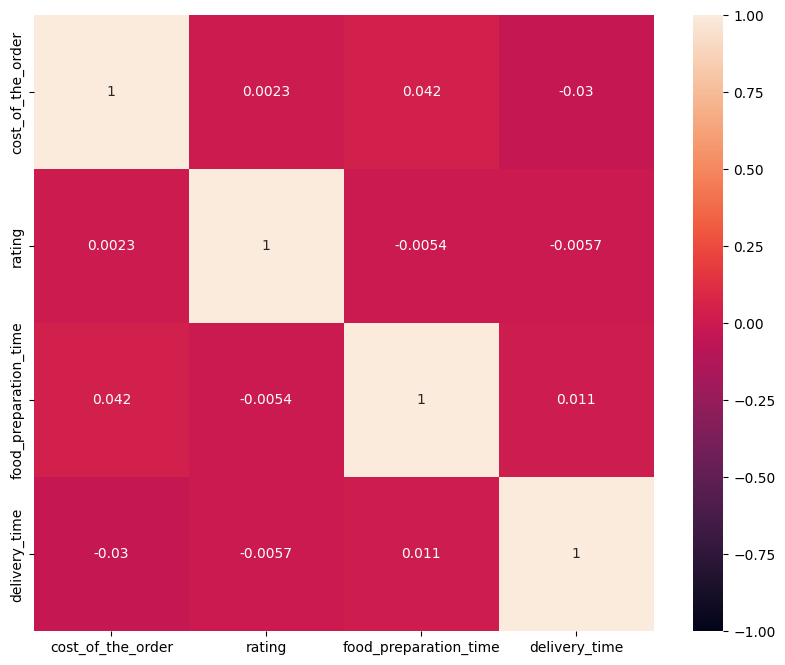

In [ ]:
plt.figure(figsize=(10, 8))
numerical_columns =['cost_of_the_order','rating','food_preparation_time','delivery_time']
numerical_data = df[numerical_columns]

corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

promotional_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)
]

print(promotional_restaurants)

               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            96        4.552083
21           Blue Ribbon Sushi           119        4.521008
109                       Parm            68        4.500000
121           RedFarm Broadway            59        4.474576
122             RedFarm Hudson            55        4.490909
136                Shake Shack           219        4.561644
153          The Meatball Shop           132        4.689394




```
# This is formatted as code
```

#### Observations:
 Most of the restaurants fulfilling the criteria have an average rating of above 4.5

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
df['net_revenue'] = np.where(df['cost_of_the_order'] > 20, df['cost_of_the_order'] * 0.25, np.where(df['cost_of_the_order'] > 5,
                                      df['cost_of_the_order'] * 0.15, 0))
net_revenue = df['net_revenue'].sum()
print(f"Net revenue generated by the company: ${net_revenue:.2f}")

Net revenue generated by the company: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
orders_more_than_60 = len(df[df['total_delivery_time'] > 60])

#Calculate the percentage of orders
percentage_more_than_60 = (orders_more_than_60 / len(df)) * 100

print(f"Percentage of orders taking more than 60 minutes to get delivered: {percentage_more_than_60:.2f}%")

Percentage of orders taking more than 60 minutes to get delivered: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"Mean delivery time during weekdays: {weekday_mean_delivery_time:.2f} minutes")
print(f"Mean delivery time during weekends: {weekend_mean_delivery_time:.2f} minutes")

Mean delivery time during weekdays: 28.34 minutes
Mean delivery time during weekends: 22.47 minutes


#### Observations:
This is consistent with the boxplot analysis for delivery times observed earlier, where the median of delivery times on weekdays was noticeably higher compared to weekends.
This suggests that deliveries on weekdays generally take longer, which aligns with the computed mean delivery time being greater on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:


*   Delivery times on weekdays are much slower than those on weekends.
*   The American cuisine is the most popular, with Shake Shack being the most popular restaurant.


*  A huge portion of orders (29.24%) cost below $20.


*   There are a few customers that are frequent, which gives more opportunities for targeted marketing.




### Recommendations:

*  Delivery times on weekdays should be quicker, as it provides more customer satisfaction and better reviews.


*   Customer ratings should be encouraged more for feedback and better business growth.
*   Promotions or discounts should be offered for orders over $20 so as to increase average order value.


*   Offer more marketing for American and other top-performing cuisines.
*   Provide more loyalty programs for customers which encourages them to repeat orders.





---